**Universidade Federal de Pernambuco - Centro de Informática**  
**Especialização em Ciência de Dados**  
**Disciplina:** Aprendizagem de Máquina  
**Discente:** Eduardo Henrique Ximenes de Melo e Menezes

# Bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection
import sklearn.preprocessing as preprocessing

import sklearn.neighbors as neighbors
import sklearn.ensemble as ensemble
import sklearn.svm as svm

# (a) Base escolhida

![Foto do gambá cusu](attachment:Brushtail%20Possum.jpg "Foto do gambá cusu")
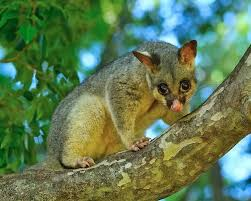

A base escolhida foi a Possum Regression, que apesar do nome, é uma base adequada tanto para regressões quanto para classificação. Ela está disponível no [Kaggle](https://www.kaggle.com/datasets/abrambeyer/openintro-possum), foi extraída de um artigo do periódico Australian Journal of Zoology, e possui informações referentes a uma espécie australiana de gambá cujos exemplares foram capturados em diferentes sítios de pesquisa em biologia para estudos. As colunas são as seguintes:  
1. case: Índice do indivíduo estudado.  
2. site: Sítio onde o indivíduo foi capturado.  
3. Pop: População à qual o indivíduo pertence, podendo ser Vic (estado Victoria) ou other (referente aos estados Queensland e New South Wales).  
4. sex: Sexo do indivíduo.  
5. age: Idade do indivíduo.  
6. hdlngth: Comprimento da cabeça em milímetros.  
7. skullw: Largura do crânio em milímetros.  
8. totlngth: Comprimento total em centímetros.  
9. taill: Comprimento da cauda em centímetros.  
10. footlgth: Comprimento do pé em milímetros.  
11. earconch: Curvatura da orelha em milímetros.  
12. eye: Distância entre o canto medial e o canto lateral do olho direito em milímetros.  
13. chest: Circunferência do tórax em centímetros.
14. belly: Circunferência da barriga em centímetros. 

Para utilizar a base ao máximo possível, criarei dois modelos de classificação para descobrir o sítio de captura, e dois modelos de regressão para descobrir o tamanho do crânio.

In [2]:
possum = pd.read_csv('possum.csv')
possum.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# (b) Pré-processamento

Antes de tudo, vou observar a natureza dos dados.

In [3]:
possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


## Descarte de case

A coluna case é apenas um identificador, que é desnecessário visto que o DataFrame já possui um índice.

In [4]:
possumMonoIndex = possum.copy()
possumMonoIndex = possumMonoIndex.drop('case', axis=1)
possumMonoIndex.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


## Valores nulos

Há dois valores nulos a tratar em age e um em footlgth. Se um mesmo indivíduo estiver com essas duas informações faltando, pretendo descartá-lo visto que dificilmente fará falta para o resto da base. Do contrário, vou apenas aplicar a média da coluna aos dados faltantes.

In [5]:
possumMonoIndex[possumMonoIndex.age.isnull()]

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
43,2,Vic,m,NaN,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0
45,2,Vic,m,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0


Um mesmo indivíduo não possui informações faltantes, então vou aplicar a média da coluna a todas as informações faltantes.

In [6]:
possumNullTreat = possumMonoIndex.copy()

possumNullTreat.age = possumNullTreat.age.fillna(possum.age.mean())
possumNullTreat.footlgth = possumNullTreat.footlgth.fillna(possum.footlgth.mean())

possumNullTreat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    object 
 2   sex       104 non-null    object 
 3   age       104 non-null    float64
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  104 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.7+ KB


## Tratamento de variáveis categóricas

Como estamos lidando com diversas medidas diferentes, é possível que o escalador mais adequado seja o StandardScaler, e por isso seria interessante deixar os valores binários de -1 a 1. Assim, no caso de sex, vou atribuir -1 a f e 1 a m, visto que animais machos possuem uma média de tamanho geralmente maior, então valores maiores para m podem auxiliar na regressão.  
No caso de estado onde o indivíduo foi capturado, vou considerar 0 para other e 1 para Vic, visto que é o único estado com uma identificação própria e que poderia fazer diferença no modelo.

In [7]:
possumCategTreat = possumNullTreat.copy()

possumCategTreat.Pop = possumCategTreat.Pop.map({'Vic':1, 'other':0})
possumCategTreat.sex = possumCategTreat.sex.map({'m':1, 'f':-1})

possumCategTreat.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,1,-1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,1,-1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,1,-1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,1,-1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


## Relação entre Pop e site

In [8]:
possumCategTreat.groupby(['Pop', 'site']).Pop.value_counts()

Pop  site  Pop
0    3     0       7
     4     0       7
     5     0      13
     6     0      13
     7     0      18
1    1     1      33
     2     1      13
Name: Pop, dtype: int64

Nota-se que não há sítios biológicos na fronteira entre estados, então a identificação do local pode auxiliar na identificação do sítio. Infelizmente, como os sítios 3 e 4 possuem menos de 10 exemplares, é possível que uma tentativa de classificação seja infrutífera se não trouxermos algum equilíbrio entre as classes por oversampling. No caso da regressão, é prudente ajustar a coluna size para um outro formato pelo get_dummies, mas antes eu preciso ajustar a escala dos dados, tendo o cuidado de separar o escalonamento entre aquele direcionado para a classificação e o direcionado para a regressão.

## Escalonando os dados

Como mencionado anteriormente, valores relacionados a medidas são mais interessantes de serem trabalhados com o StandardScaler. Eu poderia escalonar a idade por MinMaxScaler, mas não pareceu ser particularmente útil visto que tantos outros dados estavam utilizando o desvio padrão, então poderia gerar até mesmo uma confusão no modelo.  
Para a classificação, vou escalonar todos os dados exceto site, por ser o target, e Pop e sex, por já terem sido tratados. Para a regressão, eu apenas excluirei totlngth do grupo anterior, pois ele será a coluna de target, e vou escalonar site por MinMaxScaler para deixar poucos valores.

In [9]:
possumScaledCl = possumCategTreat.copy()

escalonadorStdCl = preprocessing.StandardScaler()
possumScaledCl.iloc[:,3:] = escalonadorStdCl.fit_transform(possumScaledCl.iloc[:,3:])

possumScaledCl.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,1,2.214538,0.420996,1.134883,0.445603,-0.517732,1.387779,1.557431,0.147177,0.491222,1.241874
1,1,1,-1,1.151560,-0.028932,0.231197,1.028384,-0.261331,0.928309,0.750501,0.912499,0.736833,0.150424
2,1,1,-1,1.151560,0.392875,1.005785,1.960834,1.020671,1.594541,0.921668,0.434173,1.473667,0.514241
3,1,1,-1,1.151560,0.167912,0.069825,1.144941,0.507870,1.755355,0.995025,0.147177,0.491222,0.514241
4,1,1,-1,-0.974397,-0.310136,-0.188371,-0.370290,-0.517732,0.583706,1.239549,0.051512,0.736833,0.150424


In [10]:
possumScaledRg = possumCategTreat.copy()

escalonadorStdRg = preprocessing.StandardScaler()
escalonadorMinMaxRg = preprocessing.MinMaxScaler()
possumScaledRg.site = escalonadorMinMaxRg.fit_transform(np.array(possumScaledRg.site).reshape(-1, 1))
possumScaledRg.iloc[:,3:6] = escalonadorStdRg.fit_transform(possumScaledRg.iloc[:,3:6])
possumScaledRg.iloc[:,7:] = escalonadorStdRg.fit_transform(possumScaledRg.iloc[:,7:])

possumScaledRg.sample(5)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
42,0.166667,1,-1,-0.974397,-0.731943,-0.446567,81.0,-2.568935,0.813441,0.310358,-1.574796,0.982445,-0.577209
12,0.000000,1,1,0.620071,0.702201,0.973511,89.5,-0.517732,0.583706,0.408167,0.721168,0.000000,-0.213392
51,0.333333,0,1,1.151560,1.405212,1.328530,93.5,1.533472,-0.128473,-0.936716,0.721168,0.736833,-0.031484
48,0.333333,0,1,0.088582,0.786562,0.747589,85.0,-0.004931,0.124235,-0.765549,0.816834,1.228056,1.059966
103,1.000000,0,-1,-0.442908,0.280394,0.973511,89.0,1.533472,-0.197394,-0.521025,-0.235484,0.736833,0.332332


## Sobreamostragem (Classificação)

In [11]:
possumScaledCl.groupby(['Pop', 'site']).Pop.value_counts()

Pop  site  Pop
0    3     0       7
     4     0       7
     5     0      13
     6     0      13
     7     0      18
1    1     1      33
     2     1      13
Name: Pop, dtype: int64

Nos modelos de classificação, pretendo identificar o sítio de captura dos indivíduos. Porém, como se pode perceber, há uma grande divergência entre as sete classes. Dessa maneira, vou concatenar o DataFrame com elementos de cada classe até todas terem ao menos 30 elementos. Ou seja, vou concatenar o DataFrame com os elementos dos sites 3 e 4 quatro vezes (totalizando 35 observações em cada um), dos sites 2, 5 e 6 duas vezes (totalizando 39 observações), e do site 7 uma vez (totalizando 36 observações).

In [12]:
possumOversampled = possumScaledCl.copy()

possumSite2 = possumOversampled[possumOversampled.site==2]
possumSite3 = possumOversampled[possumOversampled.site==3]
possumSite4 = possumOversampled[possumOversampled.site==4]
possumSite5 = possumOversampled[possumOversampled.site==5]
possumSite6 = possumOversampled[possumOversampled.site==6]
possumSite7 = possumOversampled[possumOversampled.site==7]

possumOversampled = pd.concat([possumOversampled, possumSite2, possumSite2, possumSite3, possumSite3, possumSite3, 
                               possumSite3, possumSite4, possumSite4, possumSite4, possumSite4, possumSite5, 
                               possumSite5, possumSite6, possumSite6, possumSite7], axis=0)

possumOversampled = possumOversampled.reset_index()
possumOversampled = possumOversampled.drop('index', axis=1)

possumOversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      256 non-null    int64  
 1   Pop       256 non-null    int64  
 2   sex       256 non-null    int64  
 3   age       256 non-null    float64
 4   hdlngth   256 non-null    float64
 5   skullw    256 non-null    float64
 6   totlngth  256 non-null    float64
 7   taill     256 non-null    float64
 8   footlgth  256 non-null    float64
 9   earconch  256 non-null    float64
 10  eye       256 non-null    float64
 11  chest     256 non-null    float64
 12  belly     256 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 26.1 KB


# (c) Divisão dos dados

## DataFrame de Classificação

Como visto anteriormente, o DataFrame de classificação, após a sobreamostragem, ficou com 256 elementos. Eu pretendo fazer um conjunto de validação com aproximadamente 15% da base e classes estratificadas, ou seja, 35 elementos. No caso dos testes, também vou fazer o conjunto com aproximadamente 15%, deixando o treino com pouco mais de 70% dos elementos.

In [13]:
clas_val = pd.concat([possumOversampled[possumOversampled.site==1].sample(5, random_state=42), 
                      possumOversampled[possumOversampled.site==2].sample(5, random_state=42), 
                      possumOversampled[possumOversampled.site==3].sample(5, random_state=42), 
                      possumOversampled[possumOversampled.site==4].sample(5, random_state=42), 
                      possumOversampled[possumOversampled.site==5].sample(5, random_state=42), 
                      possumOversampled[possumOversampled.site==6].sample(5, random_state=42), 
                      possumOversampled[possumOversampled.site==7].sample(5, random_state=42)])

clas_val = clas_val.sort_index()

clas_Xval = clas_val.drop('site', axis=1).copy()
clas_yval = clas_val.site.copy()

print(clas_Xval.head(), '\n')
print(clas_yval.head())

    Pop  sex       age   hdlngth    skullw  totlngth     taill  footlgth  \
8     1   -1  2.746027  0.224153 -0.188371  1.028384 -0.004931  0.905335   
15    1    1  0.088582 -0.282016 -0.285195 -0.253734 -1.286933  1.043176   
17    1    1 -0.974397  0.252273 -0.382018  0.678716 -0.517732  1.203991   
26    1   -1 -0.974397 -0.591341 -0.769312 -0.486846 -1.030532  0.422891   
31    1   -1  0.088582  0.477237 -0.059273  1.611166  1.020671  1.456699   

    earconch       eye     chest     belly  
8   1.166192  0.434173  0.491222  0.150424  
15  0.799406 -0.618144  0.491222 -0.213392  
17  1.777502  0.242842  0.491222 -0.213392  
26  0.652691 -0.809475 -1.964889 -1.668659  
31  0.946120 -0.139818  0.491222  0.514241   

8     1
15    1
17    1
26    1
31    1
Name: site, dtype: int64


In [14]:
clas_Xsplit = possumOversampled.drop('site', axis=1).drop(clas_Xval.index).copy()
clas_ysplit = possumOversampled.site.drop(clas_yval.index).copy()

clas_Xtrain, clas_Xtest, clas_ytrain, clas_ytest = model_selection.train_test_split(clas_Xsplit, clas_ysplit, 
                                                                                    test_size=35, stratify=clas_ysplit)

print(clas_Xtrain.info(), '\n')
print(clas_Xtest.info(), '\n')
print(clas_ytrain.info(), '\n')
print(clas_ytest.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 184 to 115
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pop       186 non-null    int64  
 1   sex       186 non-null    int64  
 2   age       186 non-null    float64
 3   hdlngth   186 non-null    float64
 4   skullw    186 non-null    float64
 5   totlngth  186 non-null    float64
 6   taill     186 non-null    float64
 7   footlgth  186 non-null    float64
 8   earconch  186 non-null    float64
 9   eye       186 non-null    float64
 10  chest     186 non-null    float64
 11  belly     186 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 18.9 KB
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 123 to 171
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pop       35 non-null     int64  
 1   sex       35 non-null     int64  
 2   age       35 non-null

## DataFrame de Regressão

In [15]:
possumScaledRg.shape[0]

104

No caso da regressão, tenho 104 elementos, mas não preciso me preocupar com estratificação dessa vez. Portanto, farei uma simples amostragem de 15 elementos para validação e 15 para teste, e o resto para treino.

In [16]:
regr_val = possumScaledRg.sample(15, random_state=42).copy()

regr_Xval = regr_val.drop('totlngth', axis=1).copy()
regr_yval = regr_val.totlngth.copy()

print(regr_Xval.head(), '\n')
print(regr_yval.head())

        site  Pop  sex           age   hdlngth    skullw     taill  footlgth  \
30  0.000000    1    1 -4.429077e-01  0.055430 -0.898410 -0.004931 -0.105500   
65  0.666667    0   -1 -4.429077e-01 -0.619461 -0.349744 -0.261331 -1.208229   
64  0.666667    0   -1  6.200707e-01  0.252273  0.166648  0.507870 -0.059553   
53  0.500000    0    1  1.683049e+00  1.208369  1.974020  3.071874  0.652626   
45  0.166667    1    1  2.360286e-16 -0.338257 -0.801587 -1.030532  0.997229   

    earconch       eye     chest     belly  
30  1.068382 -0.522479  0.000000 -0.577209  
65 -0.961168  0.625503 -0.245611  0.514241  
64 -1.572478 -1.000805  0.982445  2.151415  
53 -0.521025  2.347477  1.473667  1.423782  
45  0.750501 -0.618144 -1.228056  0.878057   

30    93.0
65    86.0
64    88.5
53    91.5
45    84.0
Name: totlngth, dtype: float64


In [17]:
regr_Xsplit = possumScaledRg.drop('totlngth', axis=1).drop(regr_Xval.index).copy()
regr_ysplit = possumScaledRg.totlngth.drop(regr_yval.index).copy()

regr_Xtrain, regr_Xtest, regr_ytrain, regr_ytest = model_selection.train_test_split(regr_Xsplit, regr_ysplit, test_size=15)

print(regr_Xtrain.info(), '\n')
print(regr_Xtest.info(), '\n')
print(regr_ytrain.info(), '\n')
print(regr_ytest.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 27 to 84
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      74 non-null     float64
 1   Pop       74 non-null     int64  
 2   sex       74 non-null     int64  
 3   age       74 non-null     float64
 4   hdlngth   74 non-null     float64
 5   skullw    74 non-null     float64
 6   taill     74 non-null     float64
 7   footlgth  74 non-null     float64
 8   earconch  74 non-null     float64
 9   eye       74 non-null     float64
 10  chest     74 non-null     float64
 11  belly     74 non-null     float64
dtypes: float64(10), int64(2)
memory usage: 7.5 KB
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 83 to 22
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      15 non-null     float64
 1   Pop       15 non-null     int64  
 2   sex       15 non-null     i

# (d) Modelos escolhidos

Decidi usar os modelos KNN e Bagging para a classificação e a regressão. No caso do Bagging, eu decidi utilizar um agrupamento de máquinas de vetor de suporte.

## Modelos de Classificação

Para a identificação dos sítios de captura, eu utilizei os modelos KNeighborsClassifier (KNN de classificação), e BaggingClassifier (Bagging de classificação).

In [18]:
clasKNN = neighbors.KNeighborsClassifier(n_neighbors=3, metric='manhattan')
clasKNN.fit(clas_Xtrain, clas_ytrain)

print('Acurácia do KNN no teste:', round(clasKNN.score(clas_Xtest, clas_ytest)*100,2))
print('Acurácia do KNN na validação:', round(clasKNN.score(clas_Xval, clas_yval)*100,2))

Acurácia do KNN no teste: 74.29
Acurácia do KNN na validação: 71.43


In [19]:
print(metrics.confusion_matrix(clas_ytest, clasKNN.predict(clas_Xtest)))
print('\n')
print(metrics.confusion_matrix(clas_yval, clasKNN.predict(clas_Xval)))

[[2 3 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 2 0 3 0 0]
 [0 0 0 5 0 0 0]
 [0 0 1 0 2 0 2]
 [0 0 0 0 0 5 0]
 [0 0 0 0 0 0 5]]


[[4 1 0 0 0 0 0]
 [2 3 0 0 0 0 0]
 [0 0 4 0 1 0 0]
 [0 0 0 5 0 0 0]
 [0 0 2 0 3 0 0]
 [0 0 0 0 0 5 0]
 [0 0 2 0 1 1 1]]


In [20]:
clasSVM = svm.SVC(kernel='linear')
clasBagging = ensemble.BaggingClassifier(estimator=clasSVM, n_estimators=5)
clasBagging.fit(clas_Xtrain, clas_ytrain)

print('Acurácia do Bagging-SVM no teste:', round(clasBagging.score(clas_Xtest, clas_ytest)*100,2))
print('Acurácia do Bagging-SVM na validação:', round(clasBagging.score(clas_Xval, clas_yval)*100,2))

Acurácia do Bagging-SVM no teste: 82.86
Acurácia do Bagging-SVM na validação: 85.71


In [21]:
print(metrics.confusion_matrix(clas_ytest, clasBagging.predict(clas_Xtest)))
print('\n')
print(metrics.confusion_matrix(clas_yval, clasBagging.predict(clas_Xval)))

[[4 1 0 0 0 0 0]
 [2 3 0 0 0 0 0]
 [0 0 5 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 1 0 4 0 0]
 [0 0 1 0 0 4 0]
 [0 0 0 0 1 0 4]]


[[4 1 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 5 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 2 0 2 1 0]
 [0 0 0 0 0 5 0]
 [0 0 0 1 0 0 4]]


O Bagging-SVM se mostrou significativamente mais consistente do que o KNN.  
O KNN se mostrou muito melhor no teste do que na validação. No teste, ele teve dificuldades para identificar corretamente as classes 1, 2 e 5; na validação, a dificuldade também foi em 1, 2 e 5, mas também na classificação 7.  
O Bagging-SVM se mostrou melhor no teste do que na validação. No teste, ele teve dificuldades para identificar corretamente as classes 2, 5 e 6; na validação, a dificuldade também foi em 2 e 5, mas também nas classificações 1 e 7.

## Modelos de Regressão

Para regressão do tamanho total, eu utilizei os modelos KNeighborsRegressor (KNN de regressão), e BaggingRegressor (Bagging de regressão).

In [22]:
regrKNN = neighbors.KNeighborsRegressor(n_neighbors=3, metric='manhattan')
regrKNN.fit(regr_Xtrain, regr_ytrain)

print('R² do KNN no teste:', round(metrics.r2_score(regr_ytest, regrKNN.predict(regr_Xtest))*100,2))
print('MSQ do KNN no teste:', round(metrics.mean_squared_error(regr_ytest, regrKNN.predict(regr_Xtest)),4))
print('R² do KNN na validação:', round(metrics.r2_score(regr_yval, regrKNN.predict(regr_Xval))*100,2))
print('MSQ do KNN no teste:', round(metrics.mean_squared_error(regr_yval, regrKNN.predict(regr_Xval)),4))

R² do KNN no teste: 58.52
MSQ do KNN no teste: 7.4873
R² do KNN na validação: 53.04
MSQ do KNN no teste: 6.7125


In [23]:
regrSVM = svm.SVR(kernel='linear')
regrBagging = ensemble.BaggingRegressor(estimator=regrSVM, n_estimators=5)
regrBagging.fit(regr_Xtrain, regr_ytrain)

print('R² do Bagging-SVM no teste:', round(metrics.r2_score(regr_ytest, regrBagging.predict(regr_Xtest))*100,2))
print('MSQ do Bagging-SVM no teste:', round(metrics.mean_squared_error(regr_ytest, regrBagging.predict(regr_Xtest)),4))
print('R² do Bagging-SVM na validação:', round(metrics.r2_score(regr_yval, regrBagging.predict(regr_Xval))*100,2))
print('MSQ do Bagging-SVM no teste:', round(metrics.mean_squared_error(regr_yval, regrBagging.predict(regr_Xval)),4))

R² do Bagging-SVM no teste: 69.57
MSQ do Bagging-SVM no teste: 5.4927
R² do Bagging-SVM na validação: 31.25
MSQ do Bagging-SVM no teste: 9.8284


O Bagging-SVM se mostrou melhor do que o KNN, mas apenas no teste. Na validação, ambos ficaram muito ineficientes.  
Talvez a quantidade de dados tenha sido a variável que causou as divergências maiores, uma vez que havia apenas 15 elementos de teste e 15 de validação.  

# (e) Ajustes nos parâmetros

## KNN

Os principais elementos do KNN, seja o classificador ou o regressor, são n_neighbors (quantidade de elementos "vizinhos" para representar uma classificação, padronizado em 5) e metric (método de calcular a distância entre dois pontos, padronizado em 'minkowski'). Vou demonstrar os resultados sem alterar os parâmetros padrão.

In [24]:
clasKNNPadrao = neighbors.KNeighborsClassifier()
clasKNNPadrao.fit(clas_Xtrain, clas_ytrain)

print('Acurácia do KNN no teste:', round(clasKNNPadrao.score(clas_Xtest, clas_ytest)*100,2))
print('Acurácia do KNN na validação:', round(clasKNNPadrao.score(clas_Xval, clas_yval)*100,2))

Acurácia do KNN no teste: 62.86
Acurácia do KNN na validação: 68.57


In [25]:
regrKNNPadrao = neighbors.KNeighborsRegressor()
regrKNNPadrao.fit(regr_Xtrain, regr_ytrain)

print('R² do KNN no teste:', round(metrics.r2_score(regr_ytest, regrKNNPadrao.predict(regr_Xtest))*100,2))
print('MSQ do KNN no teste:', round(metrics.mean_squared_error(regr_ytest, regrKNNPadrao.predict(regr_Xtest)),4))
print('R² do KNN na validação:', round(metrics.r2_score(regr_yval, regrKNNPadrao.predict(regr_Xval))*100,2))
print('MSQ do KNN no teste:', round(metrics.mean_squared_error(regr_yval, regrKNNPadrao.predict(regr_Xval)),4))

R² do KNN no teste: 44.26
MSQ do KNN no teste: 10.0605
R² do KNN na validação: 57.63
MSQ do KNN no teste: 6.0566


No caso da classificação, os parâmetros padrão mantiveram a acurácia da validação, mas a acurácia do teste teve uma queda severa, ficando até mesmo inferior à da validação.  
No caso da regressão, também houve uma redução severa na explicabilidade da variável totlngth no teste enquanto a validação teve uma melhora significativa com os parâmetros padrão.  
De um modo geral, o modelo KNN operou melhor com n_neighbors=3 e metric='manhattan'.  

## Bagging-SVM

Por si só, um Bagging é apenas um agrupamento de modelos, então os parâmetros mais importantes dele são estimator (modelo a ser agrupado, padronizado em DecisionTreeClassifier para classificação ou DecisionTreeRegressor para regressão) e n_estimators (quantidade de estimadores no grupo, padronizada em 10). Como o modelo utilizado como estimator foi o SVM, convém enfatizar que parâmetro mais relevante para ele é kernel (metodologia utilizada para matrizes, padronizada em 'rbf'). Vou demonstrar os resultados sem alterar os parâmetros padrão.

In [26]:
clasSVMPadrao = svm.SVC()
clasBaggingPadrao = ensemble.BaggingClassifier(estimator=clasSVMPadrao, n_estimators=5)
clasBaggingPadrao.fit(clas_Xtrain, clas_ytrain)

print('Acurácia do Bagging-SVM no teste:', round(clasBaggingPadrao.score(clas_Xtest, clas_ytest)*100,2))
print('Acurácia do Bagging-SVM na validação:', round(clasBaggingPadrao.score(clas_Xval, clas_yval)*100,2))

Acurácia do Bagging-SVM no teste: 80.0
Acurácia do Bagging-SVM na validação: 77.14


In [27]:
regrSVMPadrao = svm.SVR()
regrBaggingPadrao = ensemble.BaggingRegressor(estimator=regrSVMPadrao)
regrBaggingPadrao.fit(regr_Xtrain, regr_ytrain)

print('R² do Bagging-SVM no teste:', round(metrics.r2_score(regr_ytest, regrBaggingPadrao.predict(regr_Xtest))*100,2))
print('MSQ do Bagging-SVM no teste:', round(metrics.mean_squared_error(regr_ytest, regrBaggingPadrao.predict(regr_Xtest)),4))
print('R² do Bagging-SVM na validação:', round(metrics.r2_score(regr_yval, regrBaggingPadrao.predict(regr_Xval))*100,2))
print('MSQ do Bagging-SVM no teste:', round(metrics.mean_squared_error(regr_yval, regrBaggingPadrao.predict(regr_Xval)),4))

R² do Bagging-SVM no teste: 54.29
MSQ do Bagging-SVM no teste: 8.251
R² do Bagging-SVM na validação: 46.95
MSQ do Bagging-SVM no teste: 7.5835


In [28]:
regrBaggingPadrao2 = ensemble.BaggingRegressor()
regrBaggingPadrao2.fit(regr_Xtrain, regr_ytrain)

print('R² do Bagging-SVM no teste:', round(metrics.r2_score(regr_ytest, regrBaggingPadrao2.predict(regr_Xtest))*100,2))
print('MSQ do Bagging-SVM no teste:', round(metrics.mean_squared_error(regr_ytest, regrBaggingPadrao2.predict(regr_Xtest)),4))
print('R² do Bagging-SVM na validação:', round(metrics.r2_score(regr_yval, regrBaggingPadrao2.predict(regr_Xval))*100,2))
print('MSQ do Bagging-SVM no teste:', round(metrics.mean_squared_error(regr_yval, regrBaggingPadrao2.predict(regr_Xval)),4))

R² do Bagging-SVM no teste: 59.24
MSQ do Bagging-SVM no teste: 7.3574
R² do Bagging-SVM na validação: 26.13
MSQ do Bagging-SVM no teste: 10.5602


Na classificação, não houve diferença palpável no modelo Bagging-SVM com base nos parâmetros. A acurácia da validação não teve nenhuma diferença, e a do teste dos parâmetros padrão foi apenas suavemente inferior.  
Na regressão utilizando o SVM padrão, no entanto, os resultados da validação foram muito melhores, mas houve uma piora severa nos resultados do teste.  
Na regressão utilizando DecisionTreeRegressor, a validação teve resultados fracamente melhores, mas uma explicabilidade ainda muito baixa se comparada à do modelo com parâmetros diferentes do padrão.  
Na regressão, o modelo operou muito melhor com o estimator=SVM e n_estimators=5 no Bagging, e kernel='linear' no SVM.  

# (f) Ajustes em treino e teste

Como estou trabalhando com dois problemas diferentes, vou ajustar os conjuntos de treino e teste de cada um. A validação continuará com o mesmo conjunto de elementos, mas a amostra será diferente.

## Efeitos na classificação

Na validação, serão mantidos 35 elementos, parcela próxima de 15% da base. Para o teste, aumentarei de 15% para perto de 25% da base, ou 63 elementos para manter a estratificação das classes. O resto, cerca de 60%, ficará no treino.

In [29]:
clas_valAlt = pd.concat([possumOversampled[possumOversampled.site==1].sample(5, random_state=101), 
                           possumOversampled[possumOversampled.site==2].sample(5, random_state=101), 
                           possumOversampled[possumOversampled.site==3].sample(5, random_state=101), 
                           possumOversampled[possumOversampled.site==4].sample(5, random_state=101), 
                           possumOversampled[possumOversampled.site==5].sample(5, random_state=101), 
                           possumOversampled[possumOversampled.site==6].sample(5, random_state=101), 
                           possumOversampled[possumOversampled.site==7].sample(5, random_state=101)])

clas_valAlt = clas_valAlt.sort_index()

clas_XvalAlt = clas_valAlt.drop('site', axis=1).copy()
clas_yvalAlt = clas_valAlt.site.copy()

print(clas_XvalAlt.shape[0], '\n')
print(clas_yvalAlt.shape[0])

35 

35


In [30]:
clas_XsplitAlt = possumOversampled.drop('site', axis=1).drop(clas_XvalAlt.index).copy()
clas_ysplitAlt = possumOversampled.site.drop(clas_yvalAlt.index).copy()

clas_XtrAlt, clas_XtsAlt, clas_ytrAlt, clas_ytsAlt = model_selection.train_test_split(clas_XsplitAlt, clas_ysplitAlt, 
                                                                                      stratify=clas_ysplitAlt, test_size=63)

print(clas_XtrAlt.shape[0], '\n')
print(clas_XtsAlt.shape[0], '\n')
print(clas_ytrAlt.shape[0], '\n')
print(clas_ytsAlt.shape[0])

158 

63 

158 

63


In [31]:
clasKNNAlt = neighbors.KNeighborsClassifier(n_neighbors=3, metric='manhattan')
clasKNNAlt.fit(clas_XtrAlt, clas_ytrAlt)

print('Acurácia do KNN no teste:', round(clasKNNAlt.score(clas_XtsAlt, clas_ytsAlt)*100,2))
print('Acurácia do KNN na validação:', round(clasKNNAlt.score(clas_XvalAlt, clas_yvalAlt)*100,2))

Acurácia do KNN no teste: 79.37
Acurácia do KNN na validação: 80.0


In [32]:
clasSVMAlt = svm.SVC(kernel='linear')
clasBaggingAlt = ensemble.BaggingClassifier(estimator=clasSVMAlt, n_estimators=5)
clasBaggingAlt.fit(clas_XtrAlt, clas_ytrAlt)

print('Acurácia do Bagging-SVM no teste:', round(clasBaggingAlt.score(clas_XtsAlt, clas_ytsAlt)*100,2))
print('Acurácia do Bagging-SVM na validação:', round(clasBaggingAlt.score(clas_XvalAlt, clas_yvalAlt)*100,2))

Acurácia do Bagging-SVM no teste: 87.3
Acurácia do Bagging-SVM na validação: 82.86


Usar um conjunto de treino com aproximadamente 60% da base, um de teste com quase 25% e um de validação com cerca de 15% trouxe resultados muito positivos para ambos os modelos de classificação.  
Embora a acurácia do KNN no teste tenha reduzido significativamente, ela teve um aumento bastante notável na validação.  
No caso do Bagging-SVM, os resultados foram ainda melhores. Houve aumento significativo na acurácia do teste, e um aumento ainda mais expressivo na da validação, quase equiparando as duas acurácias.

## Efeitos na regressão

Novamente, será mantida a proporção de aproximadamente 15% da base para validação, ou 15 elementos. Aumentando o conjunto de teste para 25%, será necessário alocar 26 elementos.

In [33]:
regr_valAlt = possumScaledRg.sample(15, random_state=101).copy()

regr_XvalAlt = regr_valAlt.drop('totlngth', axis=1).copy()
regr_yvalAlt = regr_valAlt.totlngth.copy()

print(regr_XvalAlt.shape[0], '\n')
print(regr_yvalAlt.shape[0])

15 

15


In [34]:
regr_XsplitAlt = possumScaledRg.drop('totlngth', axis=1).drop(regr_XvalAlt.index).copy()
regr_ysplitAlt = possumScaledRg.totlngth.drop(regr_yvalAlt.index).copy()

regr_XtrAlt, regr_XtsAlt, regr_ytrAlt, regr_ytsAlt = model_selection.train_test_split(regr_XsplitAlt, regr_ysplitAlt, 
                                                                                      test_size=26)

print(regr_XtrAlt.shape[0], '\n')
print(regr_XtsAlt.shape[0], '\n')
print(regr_ytrAlt.shape[0], '\n')
print(regr_ytsAlt.shape[0])

63 

26 

63 

26


In [35]:
regrKNNAlt = neighbors.KNeighborsRegressor(n_neighbors=3, metric='manhattan')
regrKNNAlt.fit(regr_XtrAlt, regr_ytrAlt)

print('R² do KNN no teste:', round(metrics.r2_score(regr_ytsAlt, regrKNNAlt.predict(regr_XtsAlt))*100,2))
print('MSQ do KNN no teste:', round(metrics.mean_squared_error(regr_ytsAlt, regrKNNAlt.predict(regr_XtsAlt)),4))
print('R² do KNN na validação:', round(metrics.r2_score(regr_yvalAlt, regrKNNAlt.predict(regr_XvalAlt))*100,2))
print('MSQ do KNN no teste:', round(metrics.mean_squared_error(regr_yvalAlt, regrKNNAlt.predict(regr_XvalAlt)),4))

R² do KNN no teste: 36.52
MSQ do KNN no teste: 15.2371
R² do KNN na validação: 35.85
MSQ do KNN no teste: 16.3334


In [36]:
regrSVMAlt = svm.SVR(kernel='linear')
regrBaggingAlt = ensemble.BaggingRegressor(estimator=regrSVM, n_estimators=5)
regrBaggingAlt.fit(regr_XtrAlt, regr_ytrAlt)

print('R² do Bagging-SVM no teste:', round(metrics.r2_score(regr_ytsAlt, regrBaggingAlt.predict(regr_XtsAlt))*100,2))
print('MSQ do Bagging-SVM no teste:', round(metrics.mean_squared_error(regr_ytsAlt, regrBaggingAlt.predict(regr_XtsAlt)),4))
print('R² do Bagging-SVM na validação:', round(metrics.r2_score(regr_yvalAlt, regrBaggingAlt.predict(regr_XvalAlt))*100,2))
print('MSQ do Bagging-SVM no validação:', round(metrics.mean_squared_error(regr_yvalAlt, regrBaggingAlt.predict(regr_XvalAlt)),4))

R² do Bagging-SVM no teste: 70.89
MSQ do Bagging-SVM no teste: 6.987
R² do Bagging-SVM na validação: 78.41
MSQ do Bagging-SVM no validação: 5.4975


Usar um conjunto de treino com aproximadamente 60% da base, um de teste com quase 25% e um de validação com cerca de 15% trouxe resultados muito positivos para ambos os modelos de regressão.  
A explicabilidade do KNN teve um aumento significativo tanto no teste quanto na validação, ainda que tenha continuado não muito eficiente.  
No caso do Bagging-SVM, os resultados foram ainda melhores. Houve um aumento significativo na explicabilidade do conjunto de teste, mas um aumento largamente notável na de validação.